In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**1. Read the greyscale image brain.png, which is provided on the lecture homepage.
Reduce the salt and pepper noise in the image using a median filter. (3pts)**

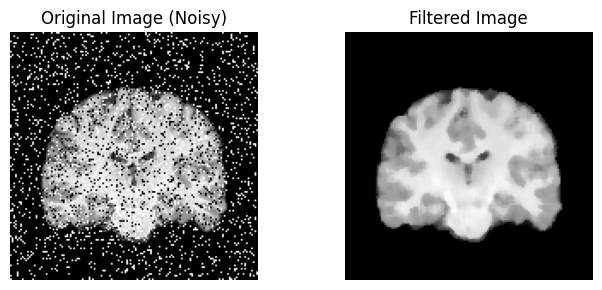

In [ ]:
# Median filtering is a non-linear digital filtering techniques, often used to remove noise.
# It works by moving a window over the image and replacing the central pixel with the median
# value of the pixels within the window.

import cv2

# load the image
image = cv2.imread('brain-noisy.png',  cv2.IMREAD_GRAYSCALE)

# Apply median filtering
filtered_image = cv2.medianBlur(image, 5)

# Display the original and filtered images for comparison
plt.figure(figsize=(7, 3))

# Display the original image
plt.subplot(1, 2, 1)
plt.title('Original Image (Noisy)')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Display the filtered image
plt.subplot(1, 2, 2)
plt.title('Filtered Image')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

# Show the results
plt.tight_layout()

plt.savefig("Noisy_filter_image_1")

plt.show()

**2. Otsu thresholding is a histogram-based method for image segmentation. Use it
to find an intensity threshold to segment brain pixels from background. Use Otsu
thresholding again to find the threshold only over the brain pixels to segment
brain's grey matter from the white matter. Using the two thresholds create three
binary masks brain-bg.png, brain-gm.png, brain-wm.png, which should be white
in regions of background, grey matter, and white matter, respectively, and black
elsewhere. (4pts)**

In [ ]:
from skimage.filters import threshold_multiotsu
from skimage.morphology import erosion, disk

# perform multi-Otsu thresholding
thresholds = threshold_multiotsu(filtered_image, classes=3)
background_threshold, gray_matter_threshold = thresholds

# create binary masks
background_mask = filtered_image <= background_threshold
gray_matter_mask = (filtered_image > background_threshold) & (
    filtered_image <= gray_matter_threshold
)
white_matter_mask = filtered_image > gray_matter_threshold

# Save masks
cv2.imwrite("brain-bg_2.png", background_mask.astype(np.uint8) * 255)
cv2.imwrite("n-gm_2.png", gray_matter_mask.astype(np.uint8) * 255)
cv2.imwrite("brain-wm_2.png", white_matter_mask.astype(np.uint8) * 255)

True

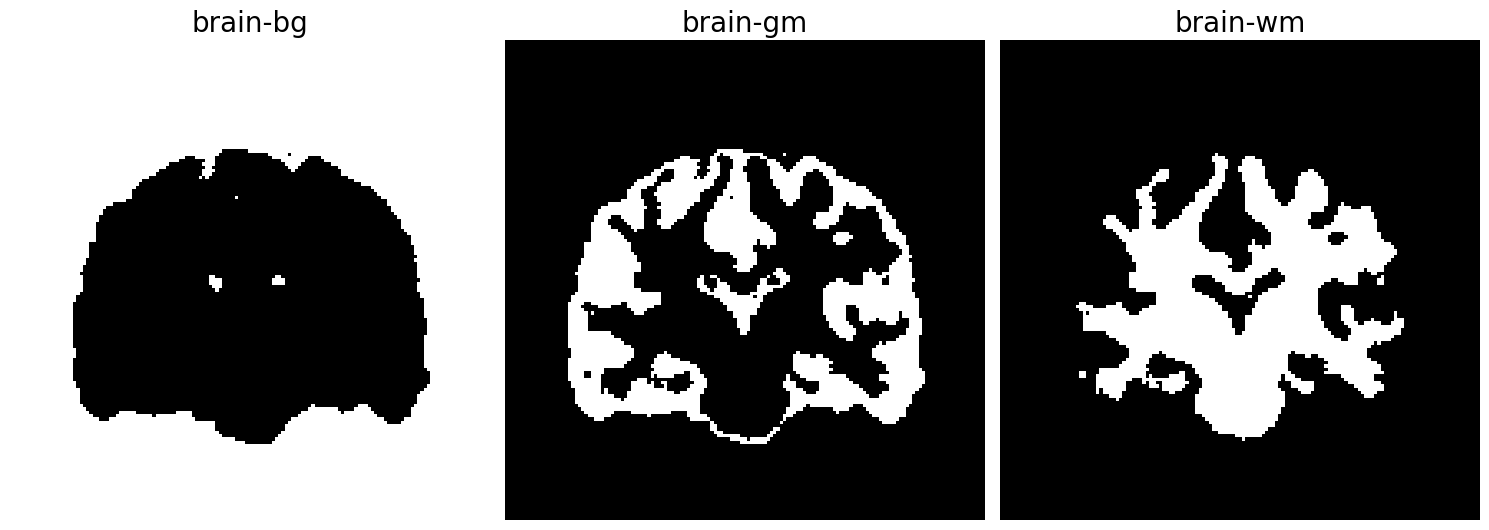

In [ ]:
# Display the original and filtered images for comparison
plt.figure(figsize=(15, 10))

# Display the original image

# Display the filtered image
plt.subplot(1, 3, 1)
plt.imshow(background_mask, cmap='gray')
plt.title('brain-bg', fontsize = 20)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_matter_mask, cmap='gray')
plt.title('brain-gm', fontsize = 20)
plt.axis('off')

# Display the filtered image
plt.subplot(1, 3, 3)
plt.imshow(white_matter_mask, cmap='gray')
plt.title('brain-wm', fontsize = 20)
plt.axis('off')

# Show the results
plt.tight_layout()

plt.savefig("brain-bg-gm-wm_2")

plt.show()

**3. Plot a log-scaled histogram of the image, which should show how frequently intensity values occur in the image. How could you roughly estimate the
two thresholds you found in the previous task just by looking at the histogram?
(3pts)**

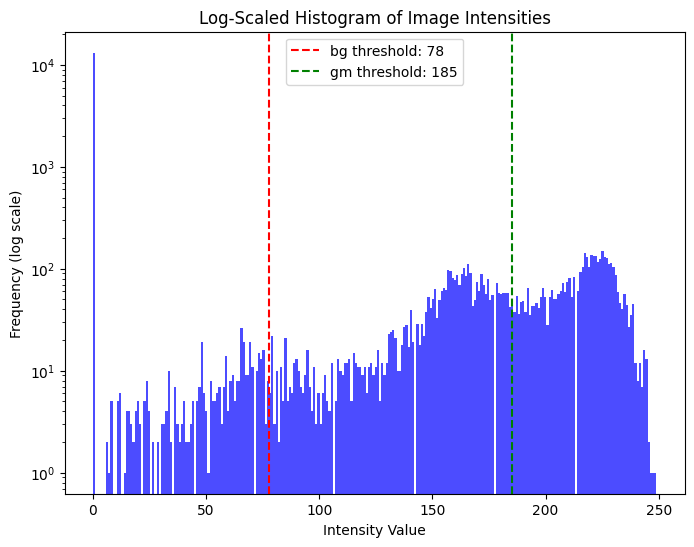

In [ ]:
# Plot a log-scaled histogram of the image intensities

plt.figure(figsize=(8, 6))
plt.hist(filtered_image.ravel(), bins=256, color="blue", alpha=0.7)
plt.yscale("log")
plt.title("Log-Scaled Histogram of Image Intensities")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency (log scale)")


plt.axvline(
    background_threshold,
    color="red",
    linestyle="--",
    label=f"bg threshold: {background_threshold}",
)
plt.axvline(
    gray_matter_threshold,
    color="green",
    linestyle="--",
    label=f"gm threshold: {gray_matter_threshold}",
)

plt.legend()
# plt.savefig("log-scaled-histogram_3")
plt.savefig("log-scaled-histogram_with_frequency_intensity_values_3")
plt.show()

**4. Combine the three masks into a single colour image so that background, grey
matter, and white matter are mapped to red, green and blue, respectively. (3pts)**

In [ ]:
# combine masks into a single color image 
# background: red, grey matter: green, white matter: blue
colored_image = np.zeros((*filtered_image.shape, 3), dtype=np.uint8)
colored_image[background_mask] = [0, 0, 255]  # red for background
colored_image[gray_matter_mask] = [0, 255, 0]  # green for gray matter
colored_image[white_matter_mask] = [255, 0, 0]  # blue for white matter

cv2.imwrite("combined_masks_4.png", colored_image)

True

**5. Use erosion (or any other morphological) filter to produce a border between the
grey and white matter. Overlay that border on the denoised input image. (3pts)**

In [ ]:
# create a boundary between grey and white matter 
# using erosion and overlay it on the denoised image
boundary = erosion(
    gray_matter_mask.astype(np.uint8), disk(3)
) ^ gray_matter_mask.astype(np.uint8)
overlay_image = filtered_image.copy()
overlay_image[boundary.astype(bool)] = 255 # red boundary

cv2.imwrite("boundary_overlay_5.png", overlay_image)

True

**6. Use bilinear interpolation to up-sample the image by a factor of four along each
axis. Apply the same thresholds as in 2) to obtain a segmentation into
background, grey matter, and white matter. Up-sample the masks from 2) in the
same way and compare the up-sampled masks to the masks from the up-
sampled image. Can you see a di\erence? Why? Repeat the same procedure
using nearest neighbour interpolation. Can you see a difference now? (4pts)**

**6.1. Use bilinear interpolation to up-sample the image by a factor of four along each axis.**

In [ ]:
from scipy.ndimage import zoom

# Up-sample the Image using Bilinear Interpolation
upsampled_bilinear = zoom(filtered_image, zoom=4, order=1)

**6.2.  Apply the same thresholds as in 2) to obtain a segmentation into background, grey matter, and white matter. Up-sample the masks from 2) in the same way and compare the up-sampled masks to the masks from the up- sampled image. Can you see a difference? Why?**

In [ ]:
# bilinear interpolation
upsampled_bilinear = zoom(filtered_image, zoom=4, order=1)

bilinear_bg_mask = upsampled_bilinear < background_threshold
bilinear_gm_mask = (upsampled_bilinear >= background_threshold) & (
    upsampled_bilinear < gray_matter_threshold
)
bilinear_wm_mask = upsampled_bilinear >= gray_matter_threshold

# save the upsampled masks as separated images
cv2.imwrite("bilinear_bg_6.png", (bilinear_bg_mask * 255).astype(np.uint8))
cv2.imwrite("bilinear_gm_6.png", (bilinear_gm_mask * 255).astype(np.uint8))
cv2.imwrite("bilinear_wm_6.png", (bilinear_wm_mask * 255).astype(np.uint8))

True

In [ ]:
# Combine the upsampled masks into a single color image

upsampled_bilinear_colored = np.zeros((*upsampled_bilinear.shape, 3), dtype=np.uint8)
upsampled_bilinear_colored[bilinear_bg_mask] = [0, 0, 255]  # Red for background
upsampled_bilinear_colored[bilinear_gm_mask] = [0, 255, 0]  # Green for gray matter
upsampled_bilinear_colored[bilinear_wm_mask] = [255, 0, 0]  # Blue for white matter

# save the single color image
cv2.imwrite('upsampled_bilinear_colored_6.png', upsampled_bilinear_colored)

True

**Upsampling the masks from 2 using the bilinear interpolation**

In [ ]:
# Upsampling the original masks from 2, using bilinear interpolation

upsampled_original_bg_bilinear = zoom(background_mask.astype(float), zoom=4, order=1) >0.5
upsampled_original_gm_bilinear = zoom(gray_matter_mask .astype(float), zoom=4, order=1) >0.5
upsampled_original_wm_bilinear = zoom(white_matter_mask.astype(float), zoom=4, order=1)>0.5


**Comparing the upsampling masks from image anf from the masks (from 2) using bilinear interpolation**

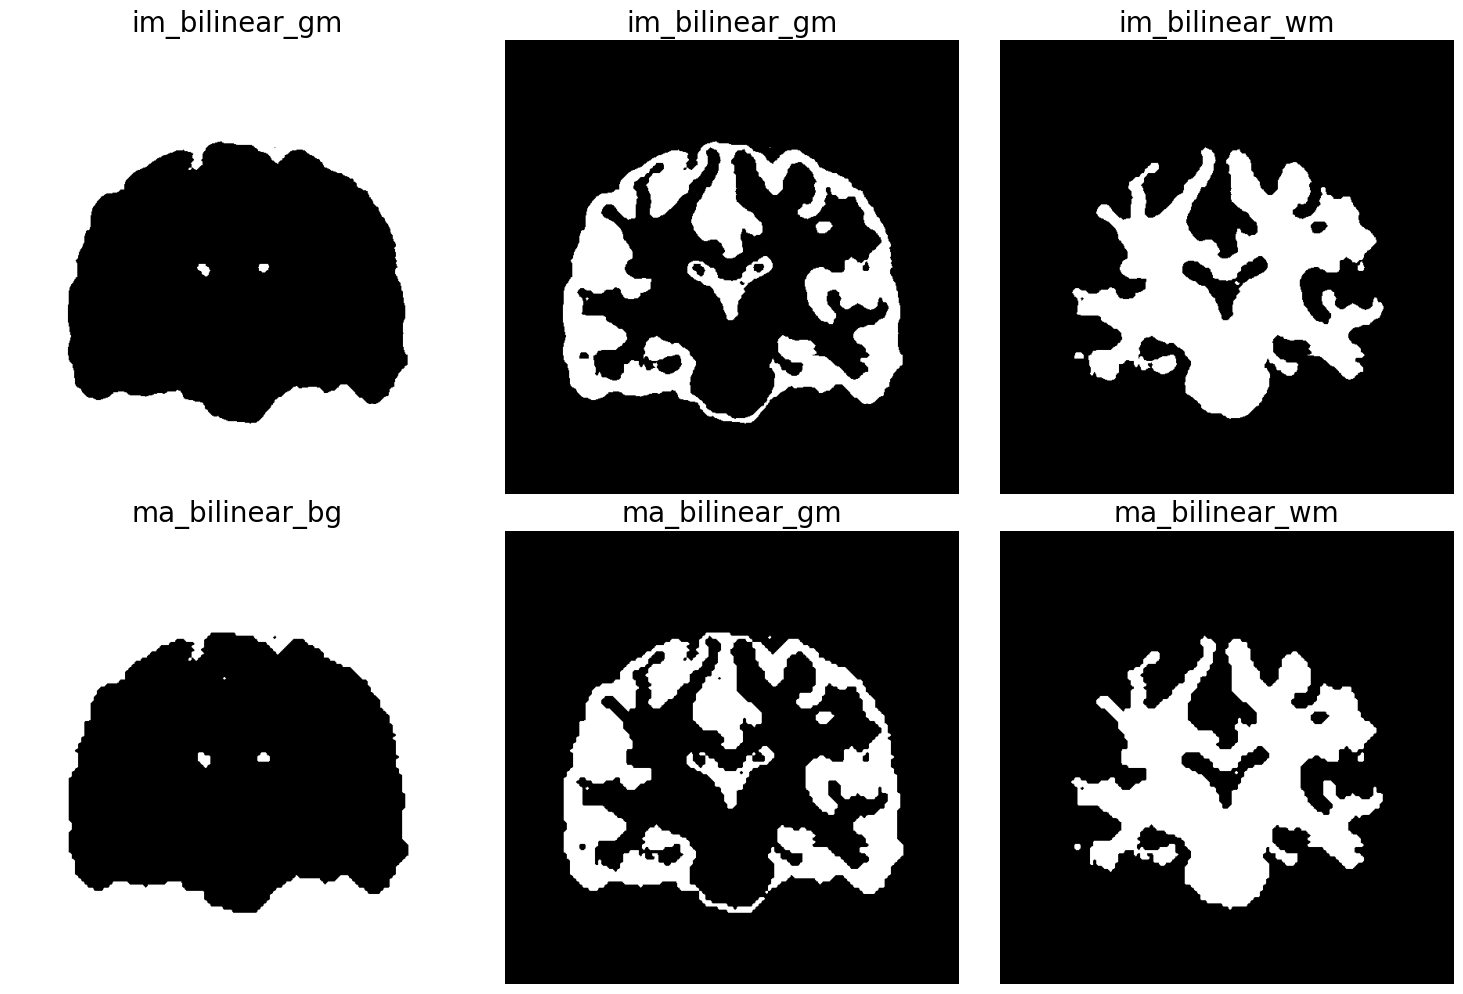

In [ ]:
plt.figure(figsize=(15, 10))

# from image
plt.subplot(2, 3, 1)
plt.imshow(bilinear_bg_mask, cmap='gray')
plt.title('im_bilinear_gm', fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(bilinear_gm_mask, cmap='gray')
plt.title('im_bilinear_gm', fontsize = 20)
plt.axis('off')

#
plt.subplot(2, 3, 3)
plt.imshow(bilinear_wm_mask, cmap='gray')
plt.title('im_bilinear_wm', fontsize = 20)
plt.axis('off')

# from mask
plt.subplot(2, 3, 4)
plt.imshow(upsampled_original_bg_bilinear, cmap='gray')
plt.title('ma_bilinear_bg', fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(upsampled_original_gm_bilinear , cmap='gray')
plt.title('ma_bilinear_gm', fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(upsampled_original_wm_bilinear, cmap='gray')
plt.title('ma_bilinear_wm', fontsize = 20)
plt.axis('off')

plt.savefig("bil_comparison_6")
# Show the results
plt.tight_layout()
plt.show()

In [ ]:
# Compare upsampled original masks to masks obtained from upsampled images
# Calculate differences for bilinear interpolation
diff_bg_bilinear = np.sum(upsampled_original_bg_bilinear != bilinear_bg_mask)
diff_gm_bilinear = np.sum(upsampled_original_gm_bilinear != bilinear_gm_mask)
diff_wm_bilinear = np.sum(upsampled_original_wm_bilinear != bilinear_wm_mask)

# Print the results to see the differences
print("Differences for Bilinear Interpolation:")
print("Background:", diff_bg_bilinear, "Gray Matter:", diff_gm_bilinear, "White Matter:", diff_wm_bilinear)

Differences for Bilinear Interpolation:
Background: 1308 Gray Matter: 4164 White Matter: 2831


**6.3. Same procedure using the nearest neighbour interpolation.**

In [ ]:
# nearest neighbor interpolation
upsampled_nearest = zoom(filtered_image, zoom=4, order=0)

nearest_bg_mask = upsampled_nearest <= background_threshold
nearest_gm_mask = (
    upsampled_nearest > background_threshold
    ) & (
    upsampled_nearest <= gray_matter_threshold
)
nearest_wm_mask = upsampled_nearest > gray_matter_threshold

In [ ]:
#Save the nearest neighbor segmented masks as separate images
cv2.imwrite('nearest_bg_6.png', (nearest_bg_mask * 255).astype(np.uint8))
cv2.imwrite('nearest_gm_6.png', (nearest_gm_mask * 255).astype(np.uint8))
cv2.imwrite('nearest_wm_6.png', (nearest_wm_mask * 255).astype(np.uint8))

True

In [ ]:
# Combine the nearest neighbor segmented masks into a single colored image
upsampled_nearest_colored = np.zeros((*upsampled_nearest.shape, 3), dtype=np.uint8)
upsampled_nearest_colored[nearest_bg_mask] = [0, 0, 255]  # Red for background
upsampled_nearest_colored[nearest_gm_mask] = [0, 255, 0]  # Green for gray matter
upsampled_nearest_colored[nearest_wm_mask] = [255, 0, 0]  # Blue for white matter

cv2.imwrite('upsampled_nearest_colored_6.png', upsampled_nearest_colored)

True

**Upsampling the masks from 2**

In [ ]:
# Up-sample the Original Masks using Nearest Neighbor Interpolation (order=0)

upsampled_original_bg_nearest = zoom(background_mask.astype(float), zoom=4, order=0) >0.5
upsampled_original_gm_nearest = zoom(gray_matter_mask.astype(float), zoom=4, order=0) >0.5
upsampled_original_wm_nearest = zoom(white_matter_mask.astype(float), zoom=4, order=0) >0.5


**Comparing the upsampling masks from image anf from the masks (from 2) using nearest neighbor interpolation**

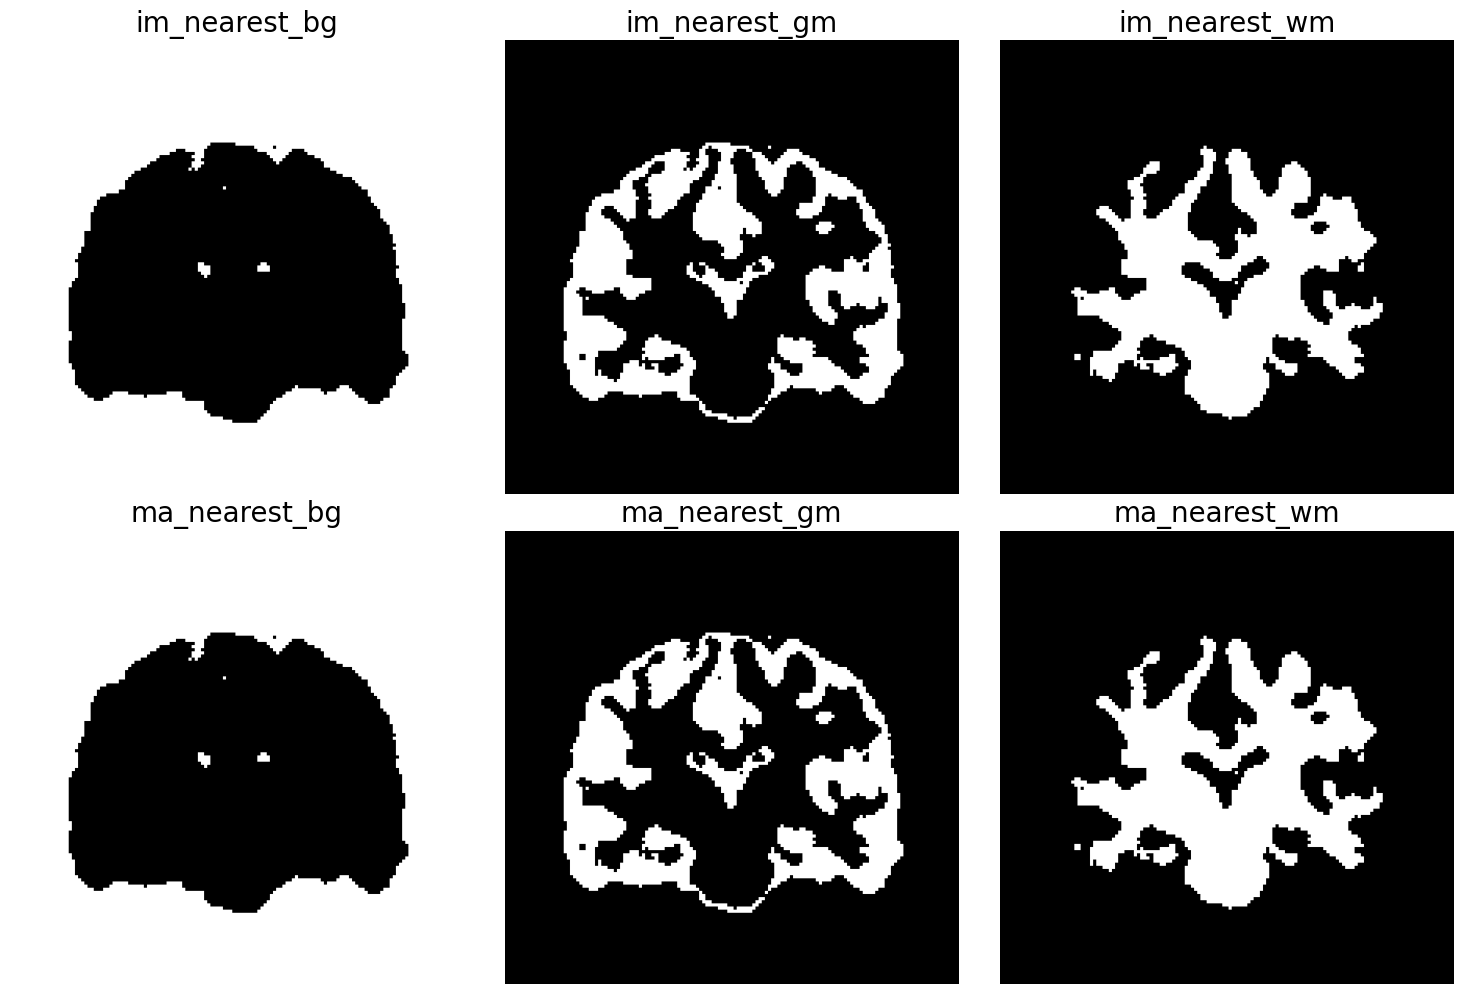

In [ ]:
plt.figure(figsize=(15, 10))

# from image
plt.subplot(2, 3, 1)
plt.imshow(nearest_bg_mask , cmap='gray')
plt.title('im_nearest_bg',fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(nearest_gm_mask , cmap='gray')
plt.title('im_nearest_gm',fontsize = 20)
plt.axis('off')

#
plt.subplot(2, 3, 3)
plt.imshow(nearest_wm_mask, cmap='gray')
plt.title('im_nearest_wm',fontsize = 20)
plt.axis('off')

# from mask
plt.subplot(2, 3, 4)
plt.imshow(upsampled_original_bg_nearest, cmap='gray')
plt.title('ma_nearest_bg',fontsize = 20)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(upsampled_original_gm_nearest , cmap='gray')
plt.title('ma_nearest_gm',fontsize = 20)
plt.axis('off')


plt.subplot(2, 3, 6)
plt.imshow(upsampled_original_wm_nearest, cmap='gray')
plt.title('ma_nearest_wm',fontsize = 20)
plt.axis('off')

plt.savefig("nn_comparison_6")

# Show the results
plt.tight_layout()
plt.show()

In [ ]:
# Calculate differences for nearest neighbor interpolation
diff_bg_nearest = np.sum(upsampled_original_bg_nearest != nearest_bg_mask)
diff_gm_nearest = np.sum(upsampled_original_gm_nearest != nearest_gm_mask)
diff_wm_nearest = np.sum(upsampled_original_wm_nearest != nearest_wm_mask)


print("Differences for Nearest Neighbor Interpolation:")
print("Background:", diff_bg_nearest, "Gray Matter:", diff_gm_nearest, "White Matter:", diff_wm_nearest)

Differences for Nearest Neighbor Interpolation:
Background: 0 Gray Matter: 0 White Matter: 0


In [ ]:
print("""
Answers to Questions:

    Can you see a difference with bilinear interpolation? Why?
        Yes, there are differences. The smoothing effect of bilinear interpolation alters how thresholds segment the image, causing mismatches between the directly up-sampled masks and the segmentation derived from the up-sampled image.
        Edges become less defined, and areas may shift slightly in size due to the averaging of pixel values around the thresholds.

    Can you see a difference with nearest neighbor interpolation?
        No, there are no differences observed. This method does not introduce any new values that could shift pixel intensities around threshold levels.
        It simply enlarges the existing pixels, preserving the original segmentation quality and boundaries exactly.
        """)


Answers to Questions:

    Can you see a difference with bilinear interpolation? Why?
        Yes, there are differences. The smoothing effect of bilinear interpolation alters how thresholds segment the image, causing mismatches between the directly up-sampled masks and the segmentation derived from the up-sampled image. 
        Edges become less defined, and areas may shift slightly in size due to the averaging of pixel values around the thresholds.

    Can you see a difference with nearest neighbor interpolation?
        No, there are no differences observed. This method does not introduce any new values that could shift pixel intensities around threshold levels. 
        It simply enlarges the existing pixels, preserving the original segmentation quality and boundaries exactly.
        
